Steps we're going to code.

1. Define the function
2. Determine the width of the rectangles.
3. Loop through each rectangle
    - a. update the x value
    - b. Find the corresponding y coordinates
    - c. find the height of the rectangle
    - d. calculate the area of the rectangle and add it to the sum
    - e. append the x, y, and height values to lists


volume:  2.706540073792195
area:  3.4260476846652517


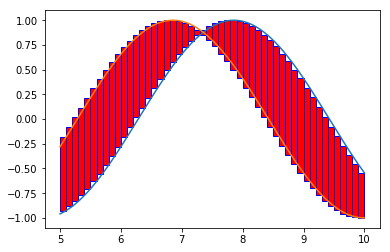

In [3]:
import math

#Initialize Variables
a = 5
b = 10
n = 50
x = a

x_list = []
f_x_list = []
g_x_list = []
h_list = []

area = 0
volume = 0

cross_section = "square"

#1. Define functions
# f(x)
def f(x):
    return math.sin(x)

# g(x)
def g(x):
    return math.sin(x+1)

#2. Determine the width of the rectangles
width = (b-a)/n


#3. loops through all the rectangles
for i in range(n):
    
    # update the x value
    #x = x + width
    x += width

    # a. Determine the y coordinates
    f_x = f(x)
    g_x = g(x)
    
    # b. Determine the height of the rectangle
    h = abs(f_x - g_x)

    # c. calculate the area of the rectangle and add it to the sum
    
    area = area+h*width
    #area += h*width
    
    if cross_section == "square":
        individual_volume = h**2*width
        volume += individual_volume
    elif cross_section == "semi_circle":
        volume = ((h/2)**2*(pi))/2
    
    
    # d. append values to lists
    x_list.append(x)
    f_x_list.append(f_x)
    g_x_list.append(g_x)
    h_list.append(h)
    
print("volume: ", volume)
print("area: ", area)
    
#Plot the function and rectangles.
from matplotlib import pyplot as plt
from matplotlib import patches

for i in range(n):
    if g(x_list[i]) >= f(x_list[i]):
        rectangle = plt.Rectangle((x_list[i]-width, f_x_list[i]), width, h_list[i], fc='r', ec = 'b')
    else:
        rectangle = plt.Rectangle((x_list[i]-width, g_x_list[i]), width, h_list[i], fc='r', ec = 'b')
    plt.gca().add_patch(rectangle)

x = a
x_vals = []
y_vals1 = []
y_vals2 = []
N = 10000
w = (b-a)/N
for i in range(N+1):
    x_vals.append(x)
    y_vals1.append(f(x))
    y_vals2.append(g(x))
    x += w
    
plt.plot(x_vals, y_vals1)
plt.plot(x_vals, y_vals2)
plt.show()  

# Volume of a Known Cross-Section

Now change the code above (step 3c!) to find the volume of a known ross section.


### Once you've found the area of a known cross-section, you can see the volumetric figure by running the code below.

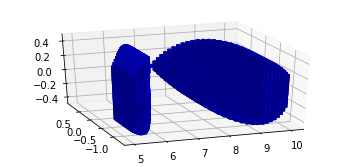

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def cuboid_data(pos, size=(1,1,1)):
    # code taken from
    # https://stackoverflow.com/a/35978146/4124317
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the (left, outside, bottom) point
    o = [a - b / 2 for a, b in zip(pos, size)]
    # get the length, width, and height
    
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1], o[1], o[1]],          
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]   
    z = [[o[2], o[2], o[2], o[2], o[2]],                       
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],   
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],               
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]               
    return x, y, z

def plotCubeAt(size, pos=(0,0,0),ax=None):
    # Plotting a cube element at position pos
    if ax !=None:
        X, Y, Z = cuboid_data(pos, size)
        ax.plot_surface(X, Y, Z, color='b', rstride=1, cstride=1, alpha=1)

def plotMatrix(ax):
    
    for i in range(n):
        x = x_list[i]
        
        if g(x) > f(x):
            y = f(x)
        else:
            y = g(x)
            
        h = abs(f(x)-g(x))
        
        plotCubeAt((width, h, h),pos=(x,y,0), ax=ax)
    

N1 = 10
N2 = 10
N3 = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.view_init(30, 250)
plotMatrix(ax)

plt.show()
